In [1]:
import numpy as np
import pandas as pd
import GPy
import time
import sys
import os
import pdb
import matplotlib.pyplot as plt

from context import aep
from context import load_data
from context import delete_blocks
from context import start_df
from context import save_df
from context import metrics
from thesis_work.plots import GP_figures
from thesis_work.plots import SGP_figures
from thesis_work.plots import DGP_figures

from baseline_models import full_GP_reg
from baseline_models import sparse_GP_reg
from aep_config import cont_optimization
from aep_config import aep_DGP_reg

default_dict = {'M': 50, 'hidden_size': [2], 
			'optimizer':'adam', 'max_it':100,
            'MB': 250, 'lr': 0.01, 'fixed_hyp': []}
os.getcwd()
%matplotlib notebook

# Load data: normalise, delete blocks

In [2]:
GPy.inference.latent_function_inference.DTC

GPy.inference.latent_function_inference.dtc.DTC

Dataset size:  2500  Test size:  1000.0
Training:  1000


<IPython.core.display.Javascript object>


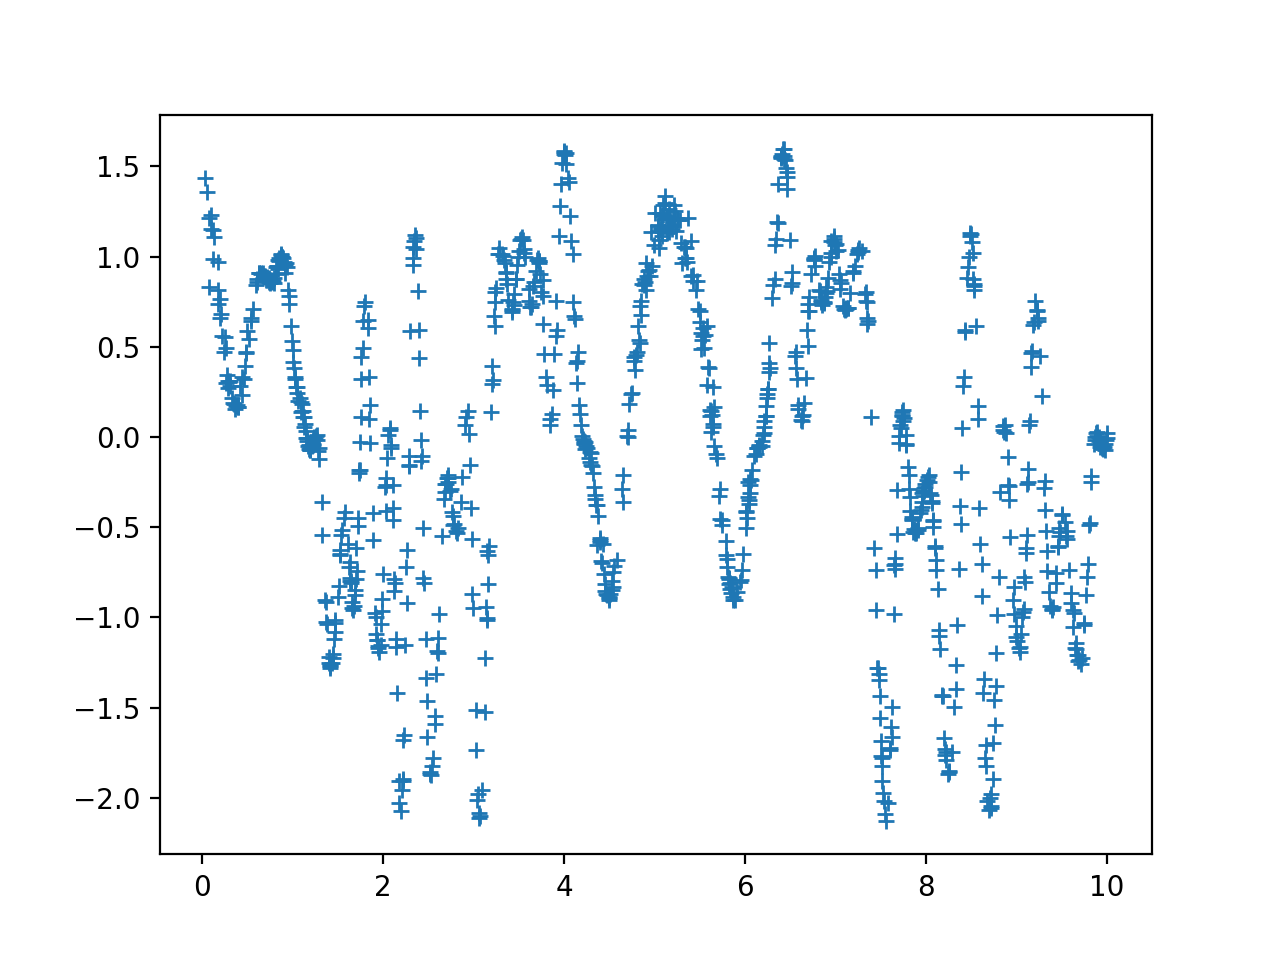

In [7]:
path = 'data/sample_3.txt'
X_train, y_train, X_test, y_test = load_data(path, N_train=1000, test=0.4, norm_out=False)
# X_test, y_test = delete_blocks(X_test, y_test,
#                                intervals=[3.5,6])
plt.figure()
plt.plot(X_test, y_test, '+')
plt.show()

## Sparse GP

create SGP model and optimize ...
Test MSE =0.011, NLL =-0.427


<IPython.core.display.Javascript object>


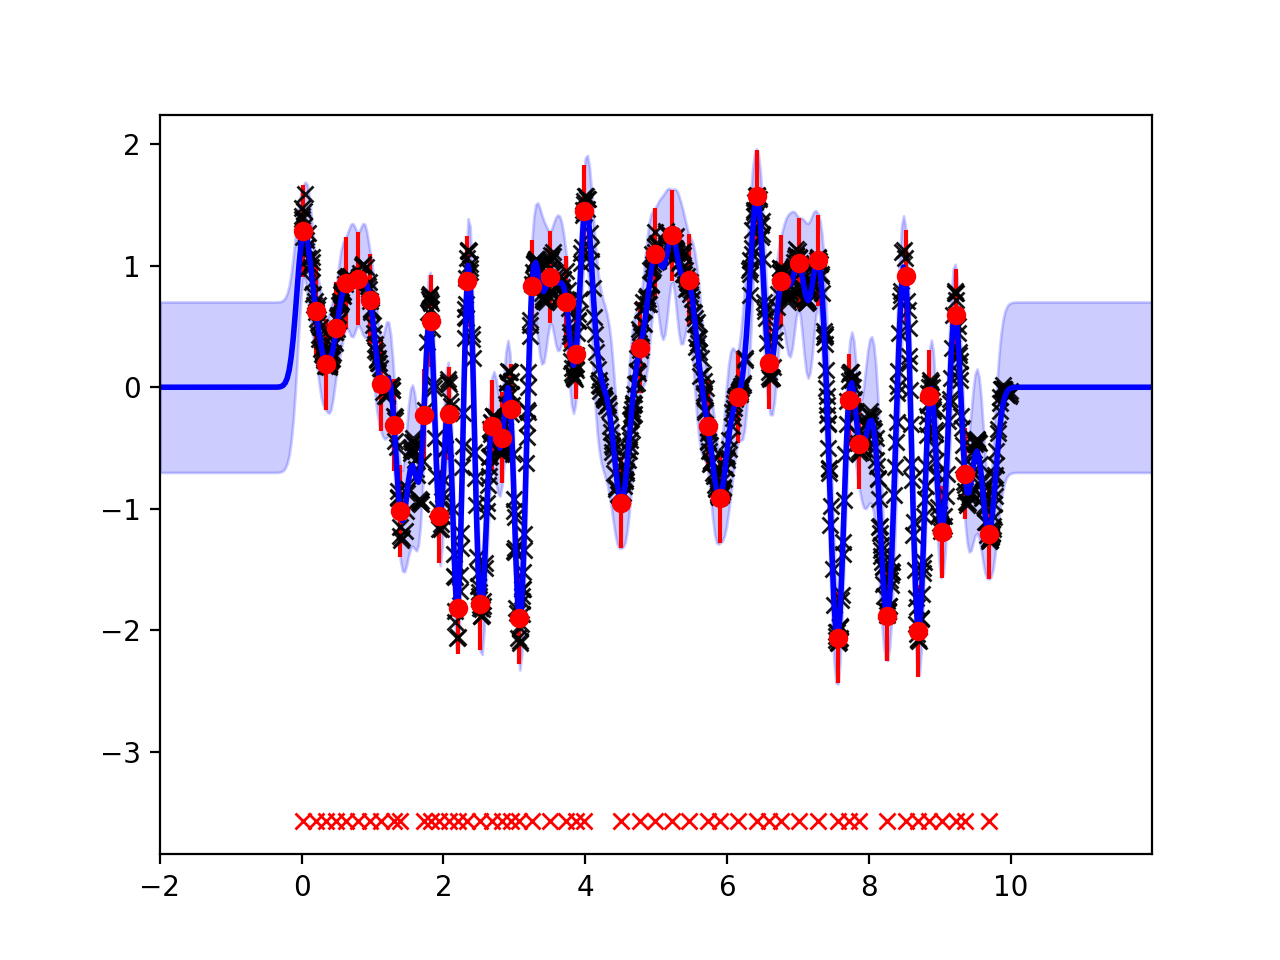

In [8]:
model_sgp, df = sparse_GP_reg(X_train, y_train, X_test, y_test, M=50)
fig = SGP_figures(model_sgp).plot()

In [1]:
mean_sgp, var_sgp = model_sgp.predict(X_test)
results_sgp = metrics.METRICS(y_test, mean_sgp, var_sgp)
mse_sgp , nll_sgp = results_sgp.mse(), results_sgp.nll() 


NameError: name 'model_sgp' is not defined

# AEP Deep GPs

Create DGP model and optimize ...
Optimise with fixed:  []
Long short initialisation
iter 0 	 obj 5.674
iter 50 	 obj 4.178
iter 100 	 obj 3.299
iter 150 	 obj 2.524
iter 200 	 obj 2.182
iter 250 	 obj 1.617
iter 300 	 obj 1.392
iter 350 	 obj 1.107
iter 400 	 obj 0.851
iter 450 	 obj 0.835
iter 500 	 obj 0.845
iter 550 	 obj 0.862
iter 600 	 obj 0.850
iter 650 	 obj 0.674
iter 700 	 obj 0.846
iter 750 	 obj 0.770
iter 800 	 obj 0.850
iter 850 	 obj 0.752
iter 900 	 obj 0.723
iter 950 	 obj 0.758
iter 1000 	 obj 0.678
iter 1050 	 obj 0.791
iter 1100 	 obj 0.739
iter 1150 	 obj 0.614
iter 1200 	 obj 0.667
iter 1250 	 obj 0.764
iter 1300 	 obj 0.822
iter 1350 	 obj 0.738
iter 1400 	 obj 0.656
iter 1450 	 obj 0.742
Test MSE= 0.210, NLL= 0.321, SN= 0.291


<IPython.core.display.Javascript object>


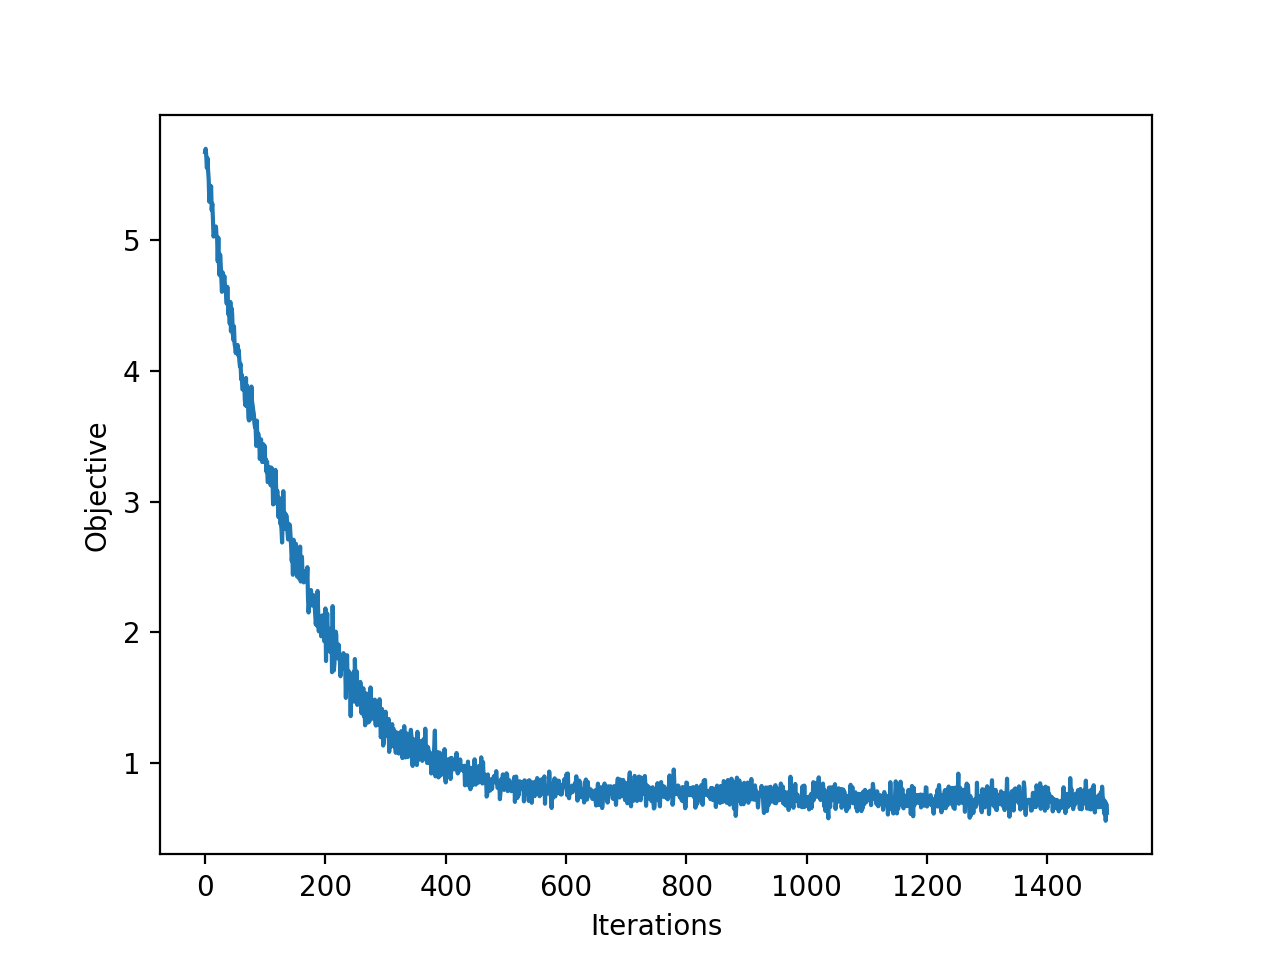

In [29]:
N_train = X_train.shape[0]
# ['zu_0', 'sf_0', 'ls_0', 'eta2_0', 'eta1_R_0']
config_dict = {'M': 50, 'hidden_size': [2], 
			'optimizer':'adam', 'max_it':1500,
            'MB': 250, 'lr': 0.01, 'fixed_hyp': [],
            'init_type':'long_short'}

model, df, costs = aep_DGP_reg(X_train, y_train, X_test, y_test, 
				conf_dict= config_dict,
				return_cost=True)
fig0 = DGP_figures(model,conf_dict=config_dict).plot_cost(costs)

In [17]:
config_dict2 = {'M': 50, 'hidden_size': [2], 
			'optimizer':'adam', 'max_it':1000,
            'MB': 250, 'lr': 0.01, 'fixed_hyp': [],
            'init_type':'greedy'}
model, df = cont_optimization(model, X_test, y_test, conf_dict=config_dict2,
                              new_max_it=1000, return_cost=False)

Optimise with fixed:  []
iter 0 	 obj 0.034
iter 50 	 obj -0.063
iter 100 	 obj 0.002
iter 150 	 obj -0.040
iter 200 	 obj 0.040
iter 250 	 obj -0.022
iter 300 	 obj -0.081
iter 350 	 obj -0.140
iter 400 	 obj -0.033
iter 450 	 obj -0.162
iter 500 	 obj -0.077
iter 550 	 obj -0.209
iter 600 	 obj -0.208
iter 650 	 obj -0.210
iter 700 	 obj -0.321
iter 750 	 obj -0.311
iter 800 	 obj -0.286
iter 850 	 obj -0.257
iter 900 	 obj -0.296
iter 950 	 obj -0.300
Test MSE= 0.011, NLL= -0.789, SN= 0.094


main_folder = 'scores/'
save_df(main_folder, df, name=config_dict['init_type']+'-5')

### Fitting plots

<IPython.core.display.Javascript object>


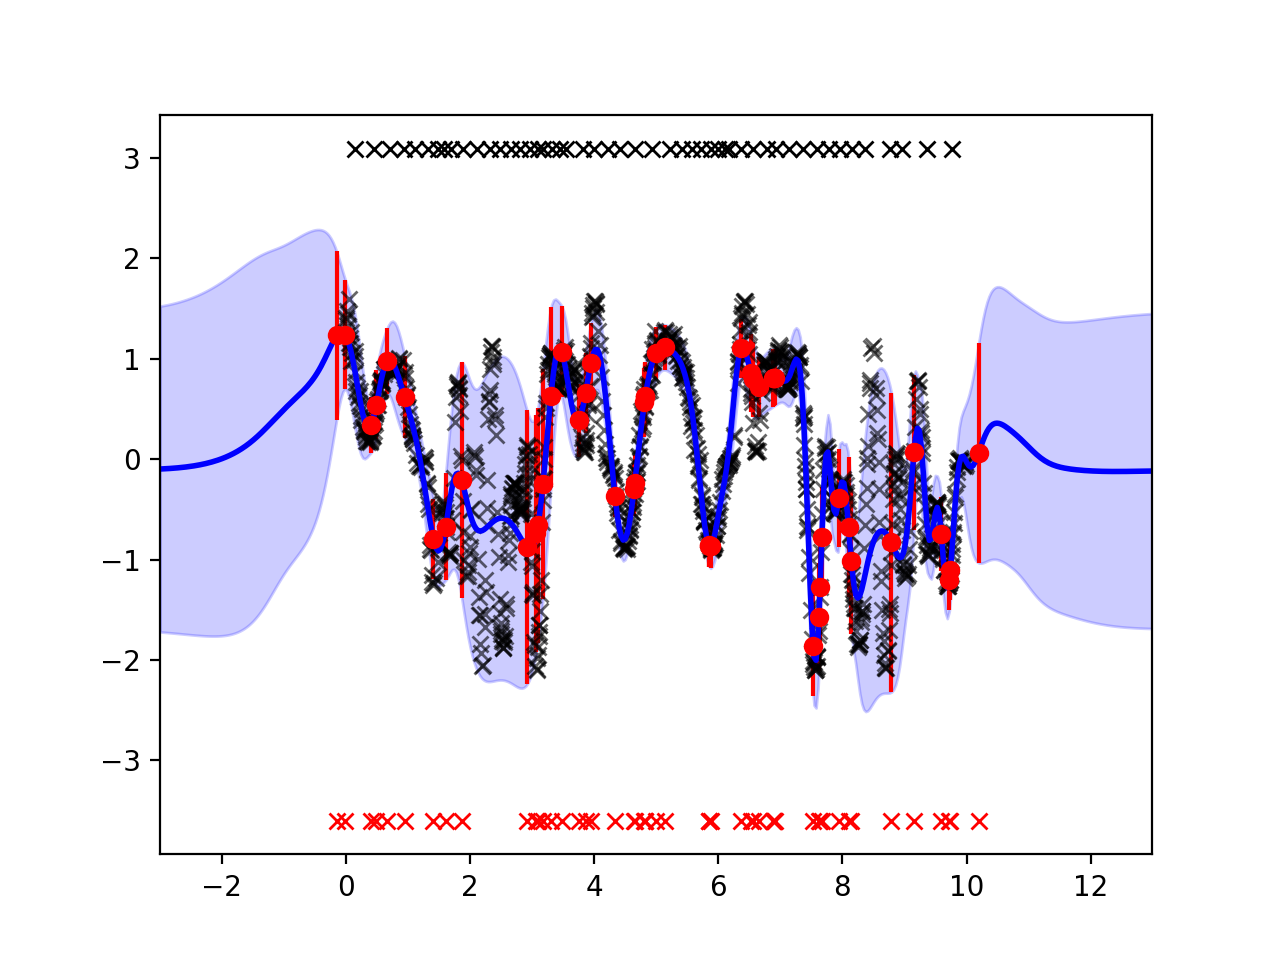

Long short initialisation


<IPython.core.display.Javascript object>


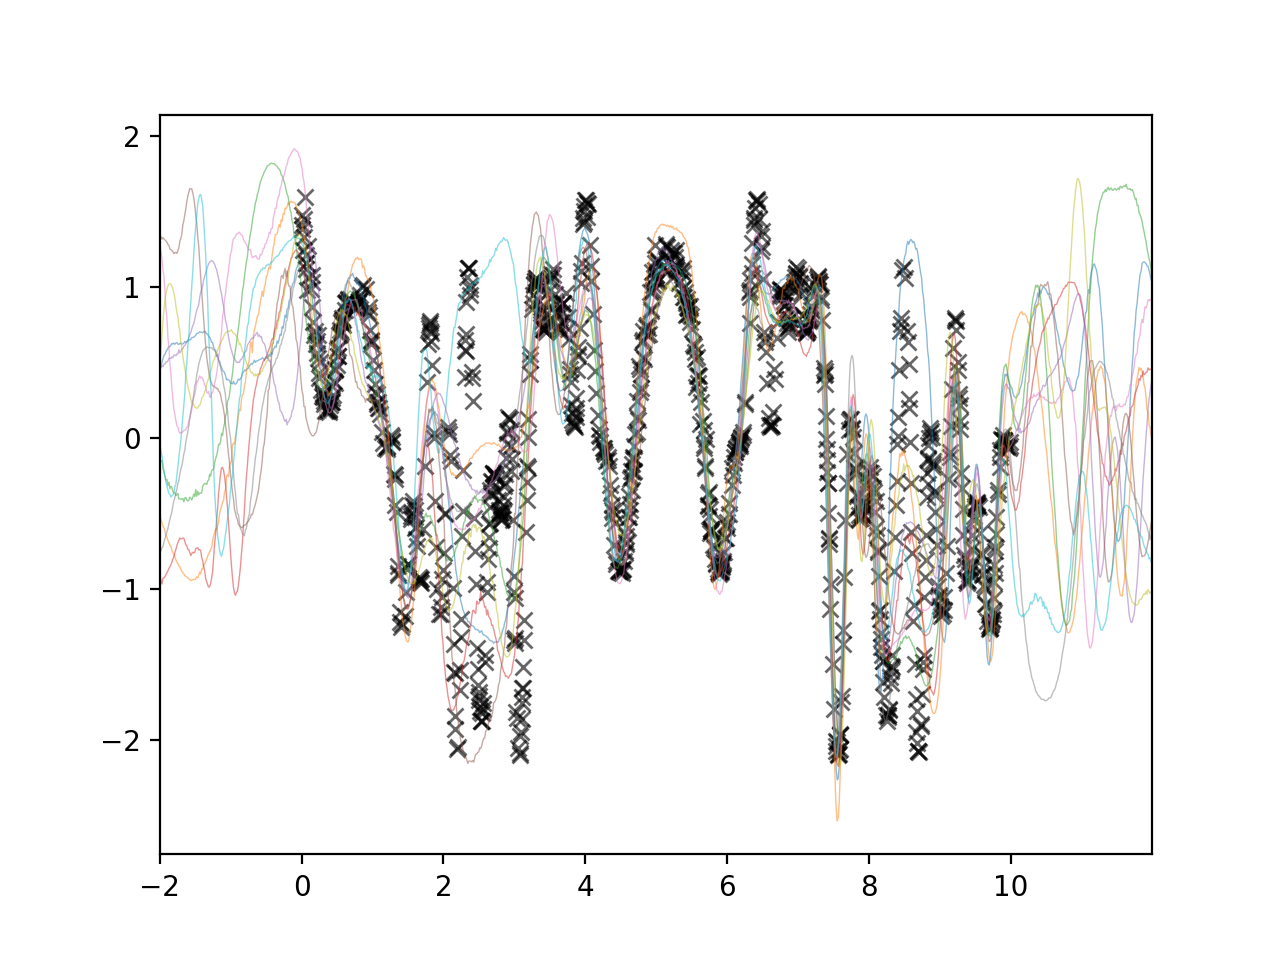

In [30]:
fig1 = DGP_figures(model, config_dict).plot()
fig2 = DGP_figures(model, config_dict).plot_sample()

### Hidden Layer

Default initialisation


<IPython.core.display.Javascript object>


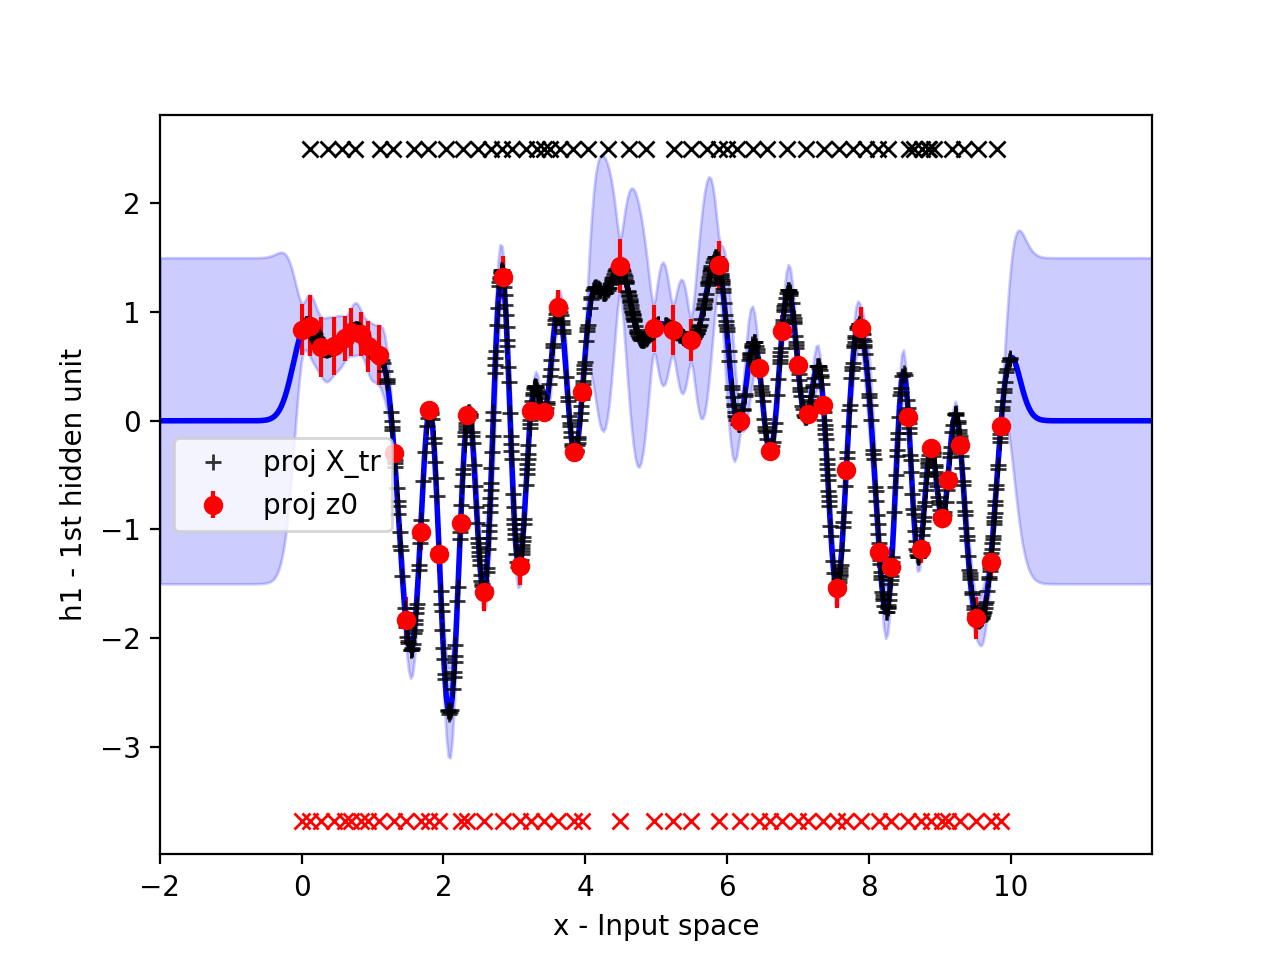

<IPython.core.display.Javascript object>


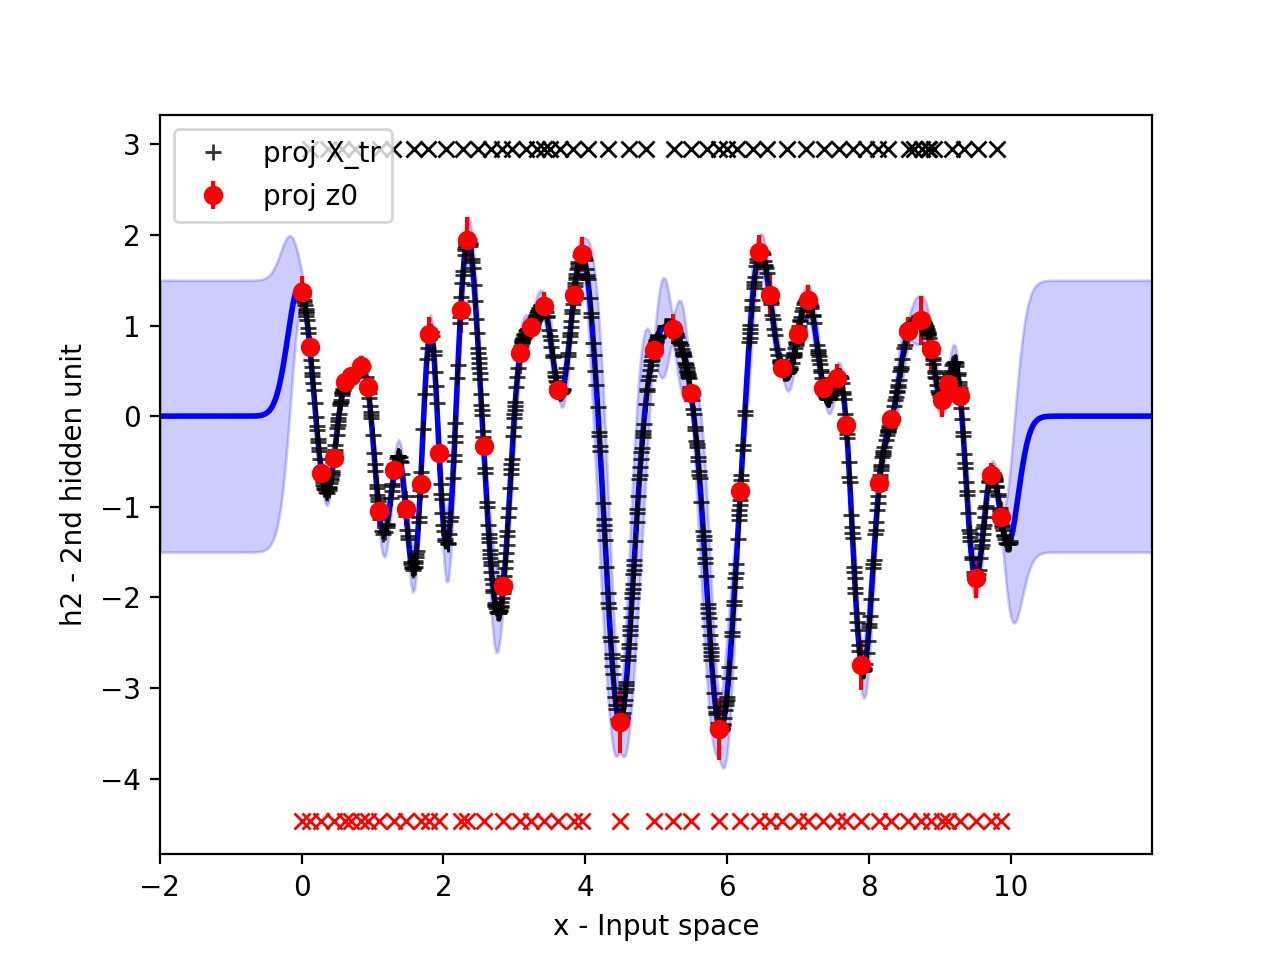

In [19]:
fig3 = DGP_figures(model, conf_dict=config_dict).plot_in_h()

Default initialisation


<IPython.core.display.Javascript object>


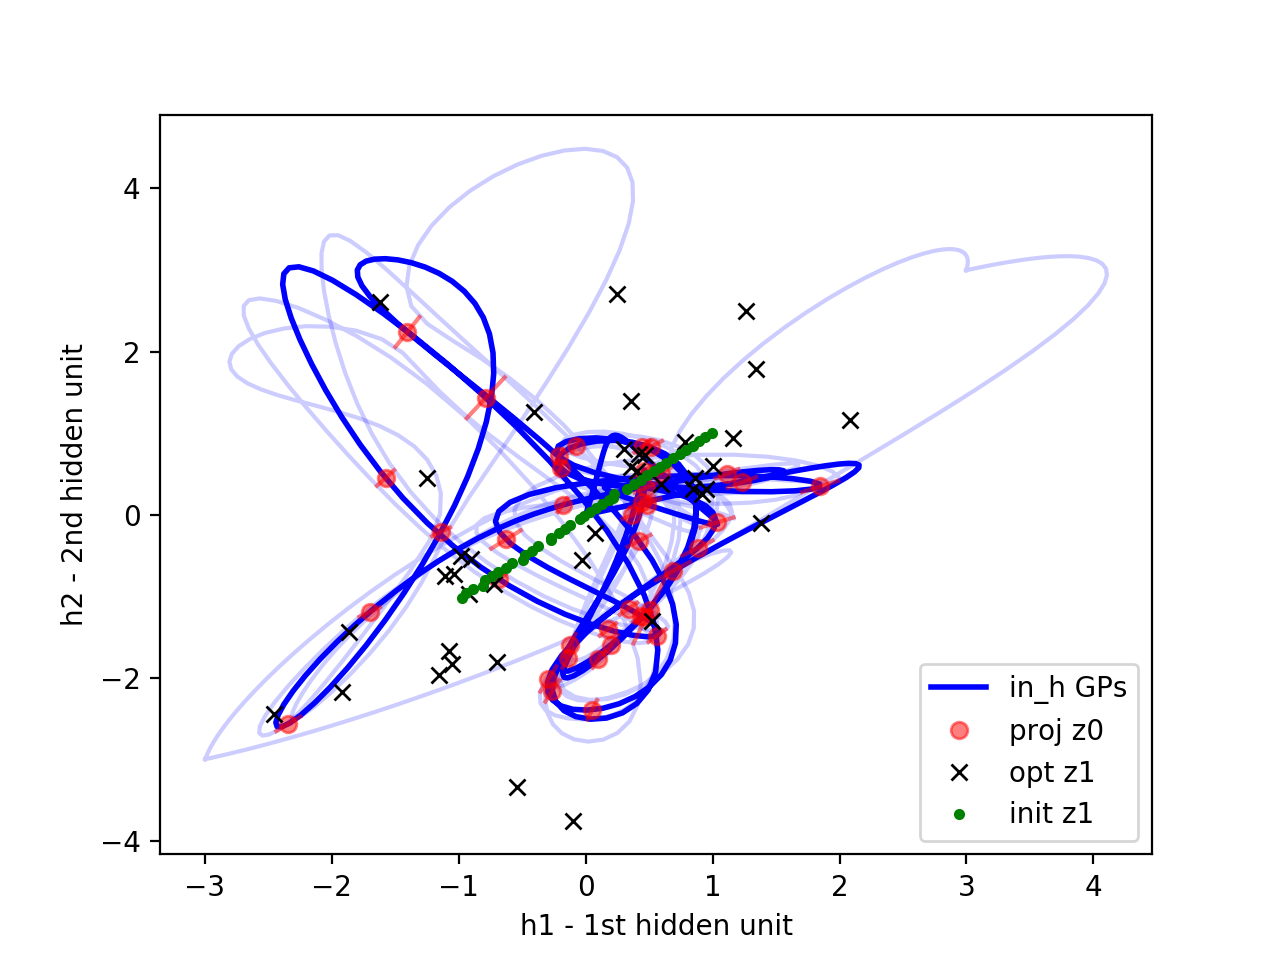

In [12]:
fig4 = DGP_figures(model, conf_dict=config_dict).plot_hidden()

Default initialisation


<IPython.core.display.Javascript object>


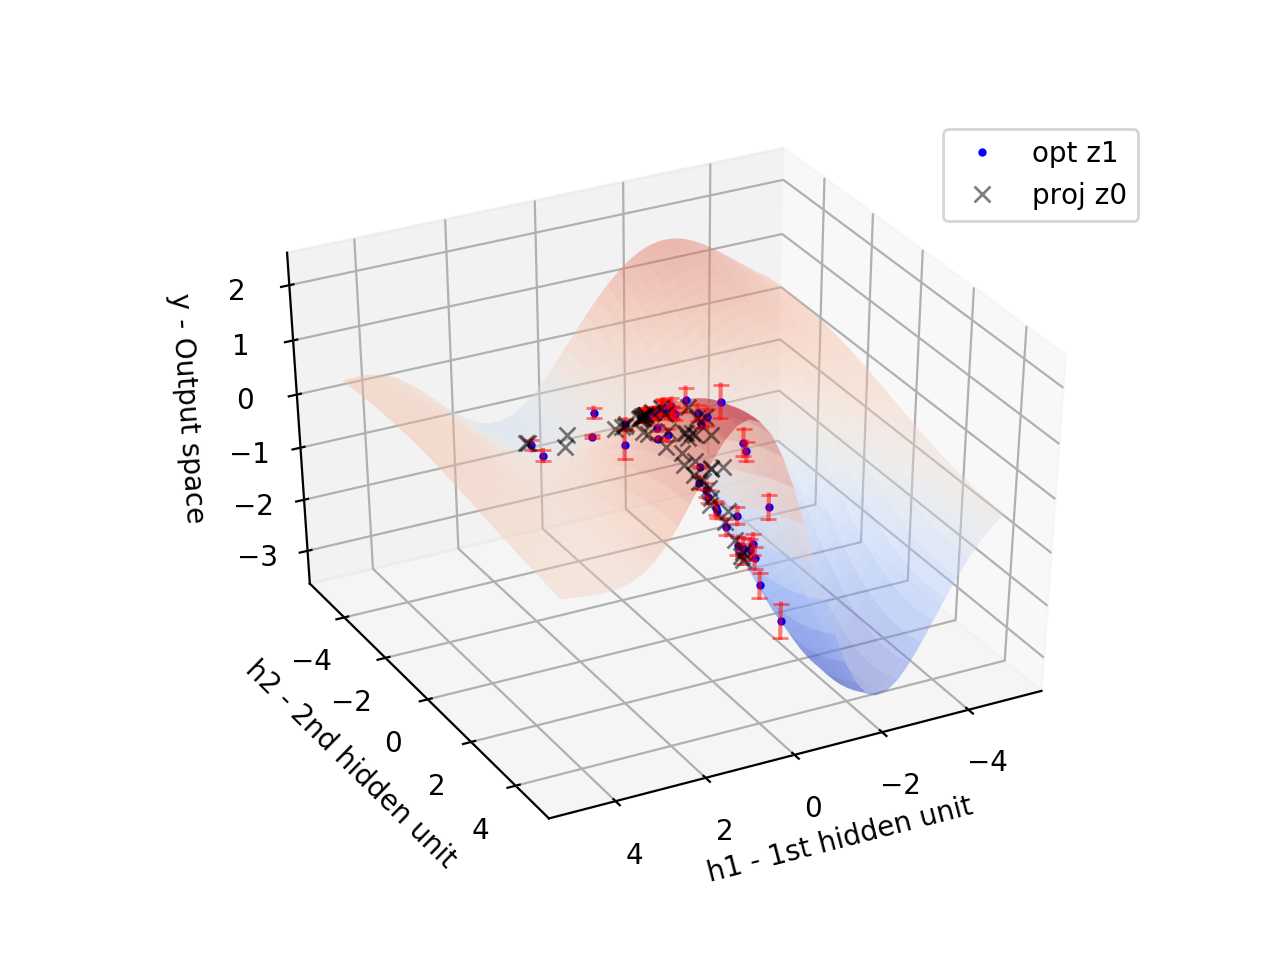

In [20]:
fig5 = DGP_figures(model, conf_dict=config_dict).plot_h_out()

### Initialisations

SGP greedy initialisation
Perform sparse GP regression
sf_0
sn
ls_0
eta2_0
zu_0
eta1_R_0


<IPython.core.display.Javascript object>


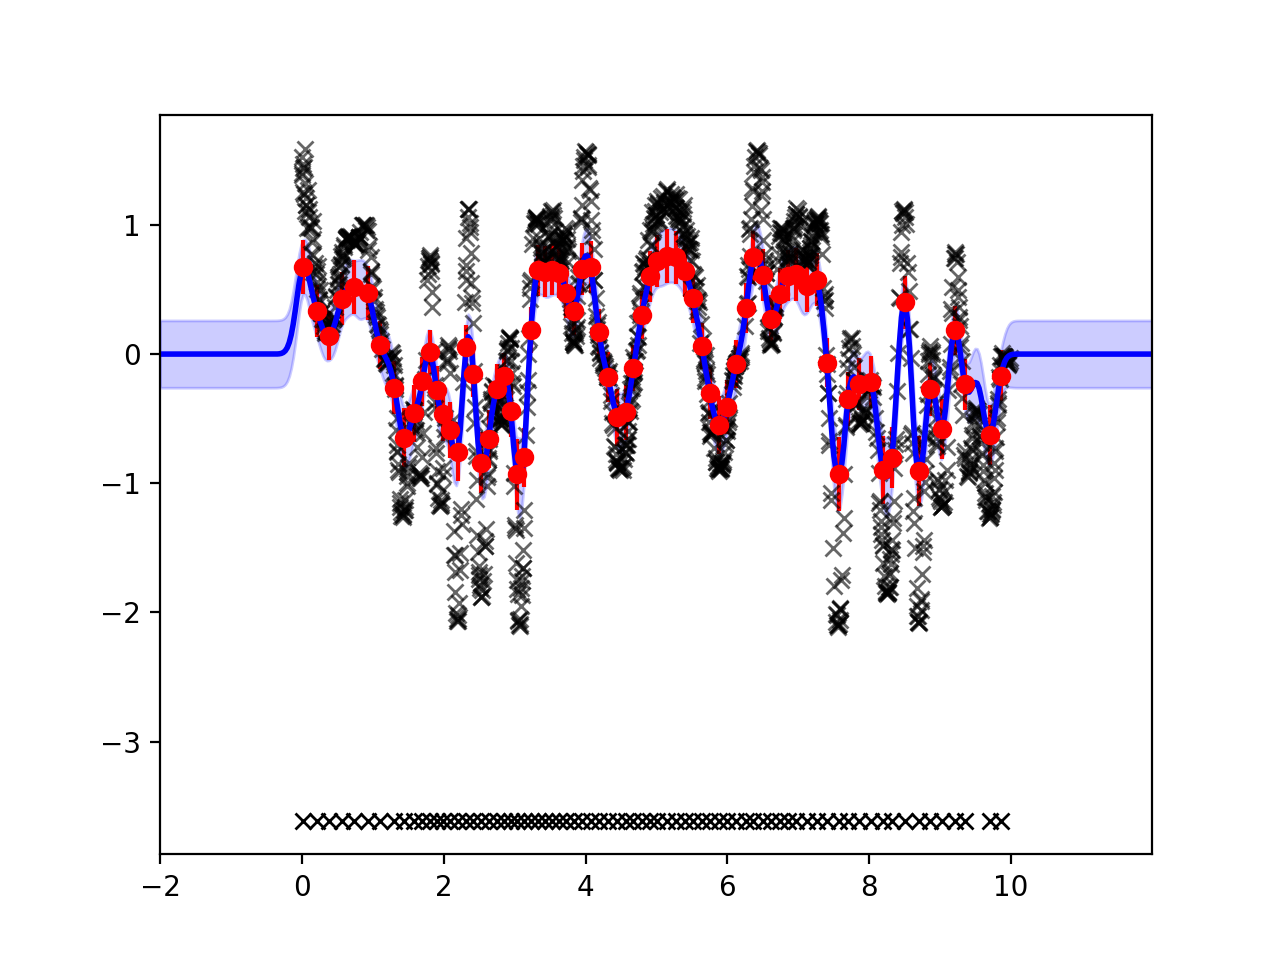

In [21]:
fig6 = DGP_figures(model, conf_dict=config_dict).plot_init()

SGP greedy initialisation
Perform sparse GP regression
sf_0
sn
ls_0
eta2_0
zu_0
eta1_R_0


<IPython.core.display.Javascript object>


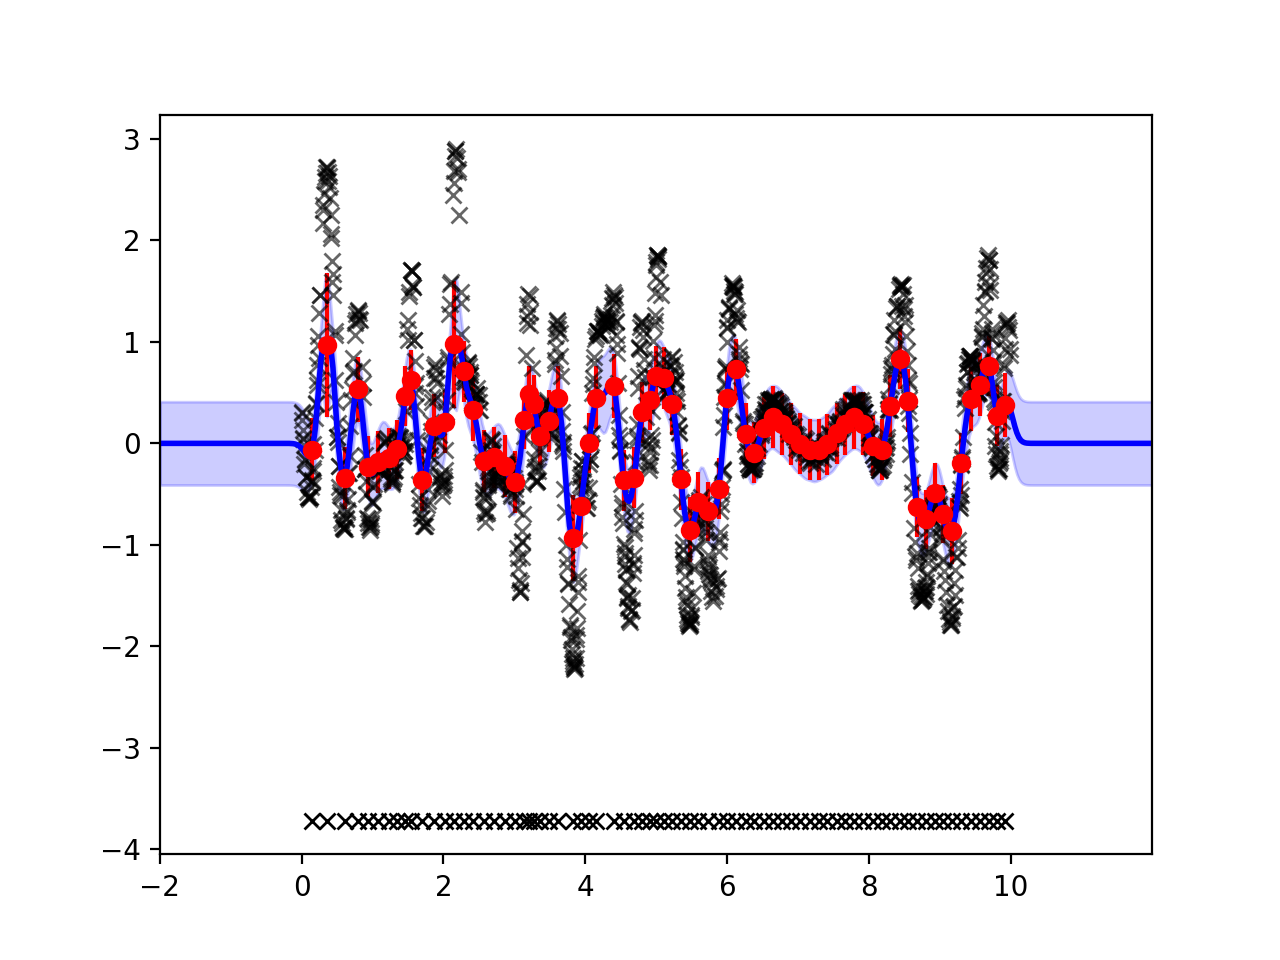

In [94]:
fig6 = DGP_figures(model, conf_dict=config_dict).plot_init()

# Baseline models

create full GP model and optimize ...
Test MSE =0.004, NLL =-1.317


<IPython.core.display.Javascript object>


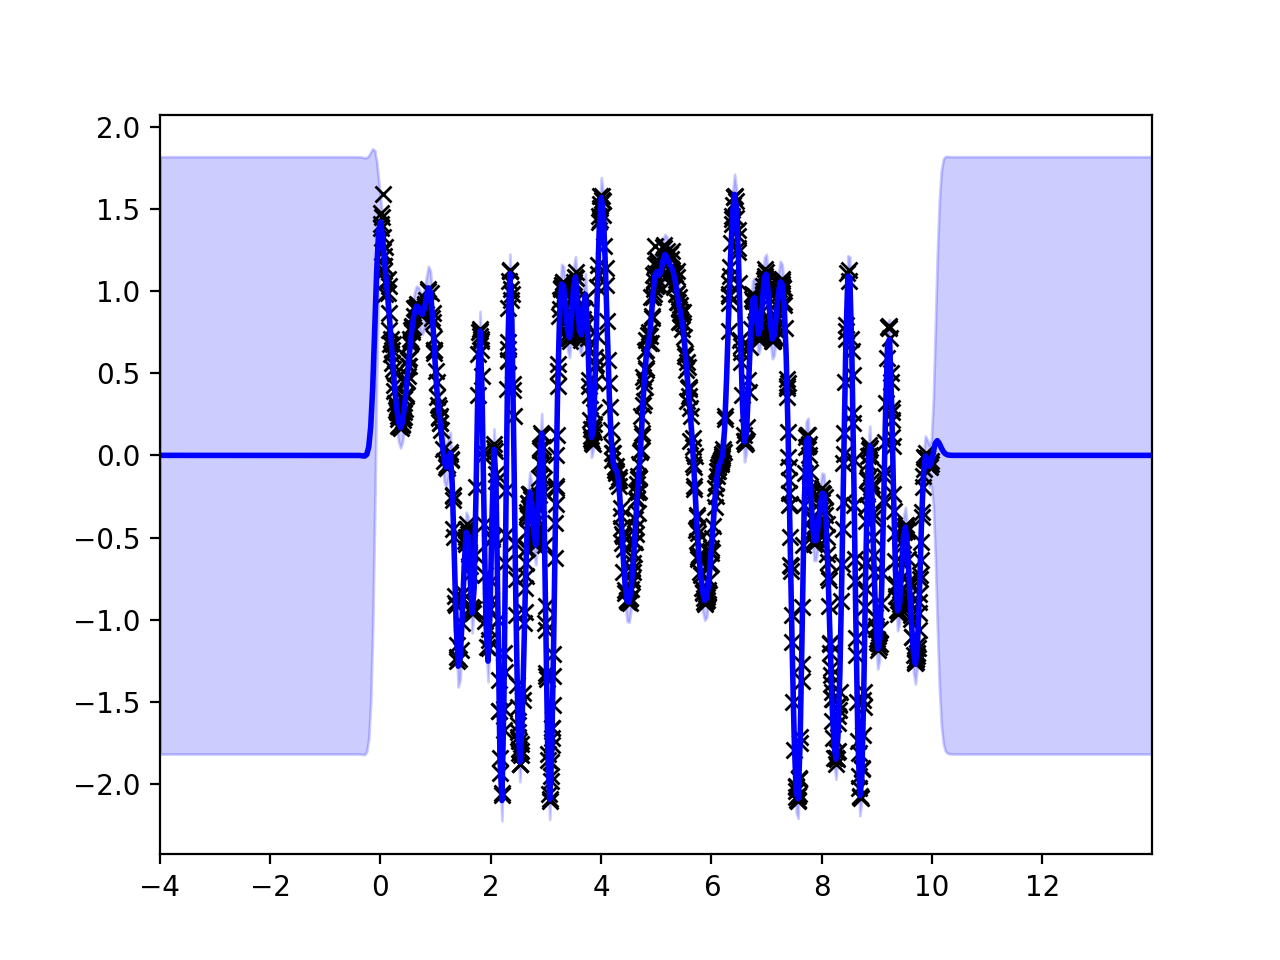

In [15]:
model_gp, df = full_GP_reg(X_train, y_train, X_test, y_test)
fig = GP_figures(model_gp).plot()

In [15]:
model_sgp = GPy.models.SparseGPRegression(X_train,y_train, kernel=GPy.kern.RBF(input_dim=1),num_inducing=50)
param = model_sgp.optimize('bfgs',messages=False)

In [16]:
zu = model_sgp.Z.values
sf = model_sgp.kern.variance.values
ls = model_sgp.kern.lengthscale.values
sn = model_sgp.likelihood.variance.values

In [17]:
def compute_kernel(lls, lsf, x, z):

    ls = np.exp(lls)
    sf = np.exp(lsf)

    if x.ndim == 1:
        x= x[ None, : ]

    if z.ndim == 1:
        z= z[ None, : ]

    r2 = cdist(x, z, 'seuclidean', V = ls)**2.0  
    k = sf * np.exp(-0.5*r2)
    return k
from scipy.spatial.distance import cdist
JITTER = 1e-5
M = 50
Dout = 1

Kuu = compute_kernel(2 * np.log(ls), 2 * np.log(sf), zu, zu)
# Kuu += np.diag(JITTER * np.ones((M, )))
Kuuinv = np.linalg.inv(Kuu)

In [18]:
print model_sgp.kern.K(zu)- Kuu

[[  1.00056757e-001   2.09137325e-251   2.58373358e-230 ...,
    3.25734980e-003   6.12440952e-055   2.22580786e-124]
 [  2.09137325e-251   1.00056757e-001   3.42721219e-002 ...,
    1.95506991e-291   4.35820532e-074   4.58659559e-024]
 [  2.58373358e-230   3.42721219e-002   1.00056757e-001 ...,
    1.11381667e-268   6.01399075e-063   4.40795604e-018]
 ..., 
 [  3.25734980e-003   1.95506991e-291   1.11381667e-268 ...,
    1.00056757e-001   3.21079592e-074   7.02528480e-153]
 [  6.12440952e-055   4.35820532e-074   6.01399075e-063 ...,
    3.21079592e-074   1.00056757e-001   5.13846560e-016]
 [  2.22580786e-124   4.58659559e-024   4.40795604e-018 ...,
    7.02528480e-153   5.13846560e-016   1.00056757e-001]]


In [19]:
Kuu = compute_kernel(2 * ls, 2 * sf, zu, zu)
Kuu += np.diag(JITTER * np.ones((M, )))
Kuuinv = np.linalg.inv(Kuu)

eta1_R = np.zeros((Dout, M * (M + 1) / 2))
eta2 = np.zeros((Dout, M))
for d in range(Dout):
    mu = np.linspace(-1, 1, M).reshape((M, 1))
    # mu += 0.01 * np.random.randn(M, 1)
    alpha = 0.5 * np.random.rand(M)
    # alpha = 0.1 * np.random.rand(M) # worse init obj = 44.2
    alpha = sn1 * np.random.rand(M)
    Su = np.diag(alpha)
    
    Suinv = np.diag(1 / alpha)
    theta2 = np.dot(Suinv, mu)
    # theta2 = np.dot(Suinv + Kuuinv, mu)
    theta1 = Suinv
    

    R = np.linalg.cholesky(theta1).T
    triu_ind = np.triu_indices(M)
    diag_ind = np.diag_indices(M)
    R[diag_ind] = np.log(R[diag_ind])
    eta1_d = R[triu_ind].reshape((M * (M + 1) / 2,))
    eta2_d = theta2.reshape((M,))
    eta1_R[d, :] = eta1_d
    eta2[d, :] = eta2_d

NameError: name 'sn1' is not defined

In [93]:
mu, Su = model_sgp.predict(zu, full_cov=True)
xx = np.linspace(0,10, 500).reshape(-1,1)
m, S = model_sgp.predict(xx)
Kuu = model_sgp.kern.K(zu)
Kuu += np.diag(1e-2* np.ones((M, )))
Kuuinv = np.linalg.inv(Kuu)
Suinv = np.linalg.inv(Su - np.diag(1e-1* np.ones((M, )))) 
theta1 = Suinv - Kuuinv + np.diag(1e-3* np.ones((M, )))
print np.min(np.linalg.eigvals(theta1))
np.linalg.cholesky(theta1).T

2.53898512968


array([[  7.44404435e+00,  -5.10264431e-13,  -4.33130118e-09, ...,
          3.74356367e-02,   1.17746155e-08,  -6.63065221e-12],
       [  0.00000000e+00,   7.00698153e+00,   4.72401406e-01, ...,
         -4.21039471e-10,  -7.27691052e-05,  -9.40852192e-03],
       [  0.00000000e+00,   0.00000000e+00,   7.11402422e+00, ...,
          5.25042220e-11,   4.90605441e-06,   1.04484510e-03],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          7.35007026e+00,  -2.39515823e-05,  -2.18202746e-07],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   7.46165582e+00,  -1.76264906e-02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   7.14911639e+00]])

eta1_R

In [33]:
eta1_R.shape

(1, 1275)

In [34]:
model_dgp = aep.SDGPR(X_train, y_train, 50, hidden_sizes=[2], lik='Gaussian')
params0 = model_dgp.optimise(method='adam', maxiter=1)

Default initialisation
iter 0 	 obj 41.159


In [35]:
for i in params0.keys():
    print i, params0[i].shape, params0[i]

zu_1 (50, 2) [[-1.001      -0.999     ]
 [-0.96018367 -0.96018367]
 [-0.91736735 -0.91936735]
 [-0.87655102 -0.87855102]
 [-0.83573469 -0.83773469]
 [-0.79491837 -0.79691837]
 [-0.75410204 -0.75610204]
 [-0.71328571 -0.71528571]
 [-0.67246939 -0.67446939]
 [-0.63165306 -0.63365306]
 [-0.59083674 -0.59283673]
 [-0.55002041 -0.55002041]
 [-0.51120408 -0.50920408]
 [-0.47038776 -0.46838776]
 [-0.42957143 -0.42757143]
 [-0.3887551  -0.3867551 ]
 [-0.34793878 -0.34593878]
 [-0.30712245 -0.30512245]
 [-0.26430612 -0.26430612]
 [-0.2234898  -0.2234898 ]
 [-0.18267347 -0.18467347]
 [-0.14185714 -0.14385714]
 [-0.10104082 -0.10304082]
 [-0.06022449 -0.06222449]
 [-0.01940816 -0.02140816]
 [ 0.02140816  0.01940816]
 [ 0.06222449  0.06022449]
 [ 0.10304082  0.10104082]
 [ 0.14385714  0.14185714]
 [ 0.18467347  0.18267347]
 [ 0.2254898   0.2234898 ]
 [ 0.26630612  0.26430612]
 [ 0.30712245  0.30512245]
 [ 0.34793878  0.34593878]
 [ 0.3887551   0.3867551 ]
 [ 0.42957143  0.42757143]
 [ 0.47038776  

In [36]:
params1 = model_dgp.optimise(method='adam', maxiter=100, reinit_hypers=False)

iter 0 	 obj 39.928
iter 50 	 obj 7.400


In [37]:
for i in params1.keys():
    print i, params1[i].shape

zu_1 (50, 2)
zu_0 (50, 1)
sf_0 (1,)
sf_1 (1,)
sn ()
ls_0 (1,)
ls_1 (2,)
eta2_1 (1, 50)
eta2_0 (2, 50)
eta1_R_1 (1, 1275)
eta1_R_0 (2, 1275)


In [80]:
zu.shape

(50, 1)

In [86]:
sn.shape

(1,)

In [24]:
samples = model.sample_f(X_test, no_samples=500).reshape(-1,500)
m = np.mean(samples,axis=1).reshape(-1,1)
v = np.var(samples,axis=1).reshape(-1,1)
from metrics import METRICS
results = METRICS(y_test, m, v)
nll = results.nll()
mse = results.mse()
print nll, mse

-0.62938302884 0.0117952715593


In [120]:
my = m
vy = v
ytest = y_test
mse = np.mean((my - ytest)**2)
nll = -np.mean(-0.5 * np.log(2 * np.pi * vy) - 0.5 * (ytest - my)**2 / vy)
print nll, mse, m.shape

-0.62938302884 0.0117952715593 (1000, 1)


In [117]:
import scipy.stats as st
N_samples = 500
N_test = X_test.shape[0]
sn = np.exp(model.get_hypers()['sn'])
print 'output noise %.3f' % (sn)

def ho_nllik(model, X_test, y_test, N_samples=100):
    N_test = X_test.shape[0]
    samples = model.sample_f(X_test, no_samples=N_samples).reshape(-1,N_samples)
    sn = np.exp(model.get_hypers()['sn'])
    ho_lik = 0.0
    for i in range(N_test):
        mixture = st.norm.pdf(y_test[i], loc=samples[i,:], scale=np.sqrt(sn))
        ho_lik += np.log(np.mean(mixture))
    return -ho_lik/N_test



output noise 0.134
0.0789159864371


In [109]:
ho_lik = 0.0
for i in range(N_test):
    mixture = st.norm.pdf(y_test[i], loc=samples[i,:], scale=np.sqrt(sn))
    ho_lik += np.log(np.mean(mixture))
print -ho_lik/N_test

0.0797782628569


[ 5.79031613] [ 4.45778311]
[-0.65552282] [-0.85602609]


<IPython.core.display.Javascript object>


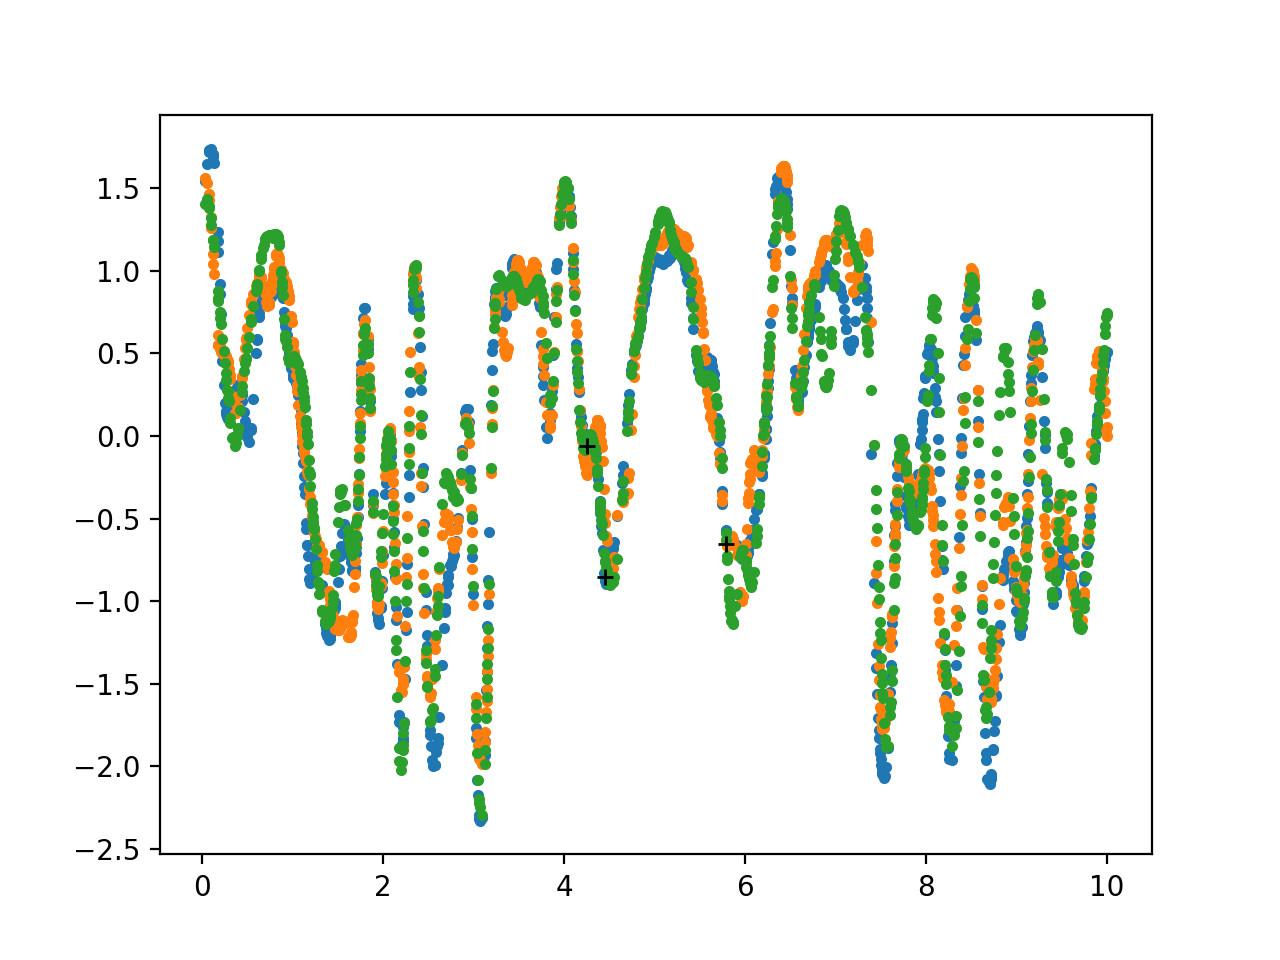

1.07715931423
[ 1.05867454] -0.56928326177 [ 1.0870525]


In [118]:
print X_test[0], X_test[1]
print y_test[0], y_test[1]
plt.figure()

for k in range(3):
    plt.plot(X_test[:], samples[:,k],'.')
plt.plot(X_test[0:3], y_test[0:3],'+k')
plt.plot
plt.show()

mixture = st.norm.pdf(y_test[0], loc=samples[0,0:3], scale=np.sqrt(sn))
print mixture.mean()
def gauss(x, m, v):
    pdf_val = 1.0/np.sqrt(2*np.pi*v) * np.exp(-0.5 * (x-m)**2/v)
    return pdf_val

print gauss(y_test[0],samples[0,0], sn ),samples[0,0] , gauss(y_test[0],samples[0,1], sn )

<IPython.core.display.Javascript object>


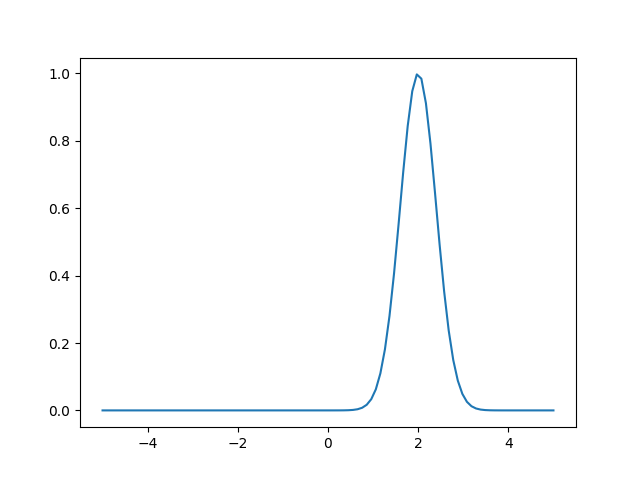

In [37]:
xx = np.linspace(-5, 5, 100)
yy = st.norm.pdf(xx, loc=2, scale=np.sqrt(1.0/(2*np.pi)))
plt.figure()
plt.plot(xx,yy)
plt.show()

In [116]:
model_sgp.sampling_runs

[]